In [2]:
import os
import shutil
import random

# Original paths
lung_image_dir = 'lung_colon_image_set/lung_image_sets'
colon_image_dir = 'lung_colon_image_set/colon_image_sets'

# Target paths
base_dir = 'final_dataset'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Create directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Split ratio
split_ratio = 0.8

# List of class folders
class_folders = []

# Add lung classes
for class_name in os.listdir(lung_image_dir):
    class_folders.append(os.path.join(lung_image_dir, class_name))

# Add colon classes
for class_name in os.listdir(colon_image_dir):
    class_folders.append(os.path.join(colon_image_dir, class_name))

# Process each class
for class_path in class_folders:
    class_name = os.path.basename(class_path)
    
    # Create class folders in train/test
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)
    
    # List images
    images = os.listdir(class_path)
    random.shuffle(images)
    
    split_index = int(len(images) * split_ratio)
    
    train_images = images[:split_index]
    test_images = images[split_index:]
    
    # Copy train images
    for img in train_images:
        src = os.path.join(class_path, img)
        dst = os.path.join(train_dir, class_name, img)
        shutil.copy(src, dst)
    
    # Copy test images
    for img in test_images:
        src = os.path.join(class_path, img)
        dst = os.path.join(test_dir, class_name, img)
        shutil.copy(src, dst)
    
    print(f"Processed class '{class_name}': {len(train_images)} train, {len(test_images)} test")

print("Final dataset split completed!")


Processed class 'lung_aca': 4000 train, 1000 test
Processed class 'lung_n': 4000 train, 1000 test
Processed class 'lung_scc': 4000 train, 1000 test
Processed class 'colon_aca': 4000 train, 1000 test
Processed class 'colon_n': 4000 train, 1000 test
Final dataset split completed!


## Lung Cancer Detection Using CNN

In [3]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
# Paths
train_dir = 'final_dataset/train'
test_dir = 'final_dataset/test'

In [5]:
# Image size and batch size
img_size = (150, 150)
batch_size = 32

In [6]:
# Data Generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
# Flow from directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 20000 images belonging to 5 classes.
Found 5000 images belonging to 5 classes.


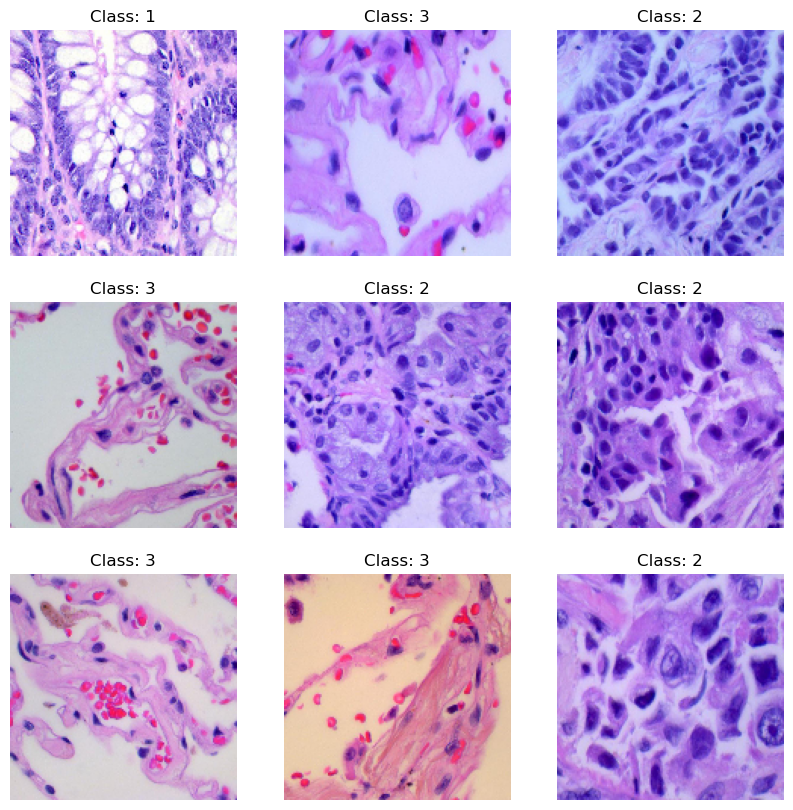

In [8]:
# Visualize some images
x_batch, y_batch = next(train_generator)

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_batch[i])
    plt.title(f"Class: {np.argmax(y_batch[i])}")
    plt.axis('off')
plt.show()

In [9]:
# Build CNN model
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(train_generator.num_classes, activation='softmax'))

c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# Train
epochs = 15

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator
)

c:\Users\USER\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 798s 1s/step - accuracy: 0.6697 - loss: 0.7153 - val_accuracy: 0.8578 - val_loss: 0.3977
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 426s 682ms/step - accuracy: 0.8596 - loss: 0.3402 - val_accuracy: 0.8882 - val_loss: 0.2921
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 641s 1s/step - accuracy: 0.9101 - loss: 0.2348 - val_accuracy: 0.9332 - val_loss: 0.1922
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 248s 397ms/step - accuracy: 0.9272 - loss: 0.1910 - val_accuracy: 0.9536 - val_loss: 0.1290
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 264s 422ms/step - accuracy: 0.9444 - loss: 0.1483 - val_accuracy: 0.9316 - val_loss: 0.1758
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 278s 444ms/step - accuracy: 0.9585 - loss: 0.1145 - val_accuracy: 0.9584 - val_loss: 0.1171
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 295s 472ms/step - accuracy: 0.9705 - loss: 0.0837 - val_accuracy: 0.9490 - val_loss: 0.1537
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 457s 731ms/step - accuracy: 0.9710 - loss:

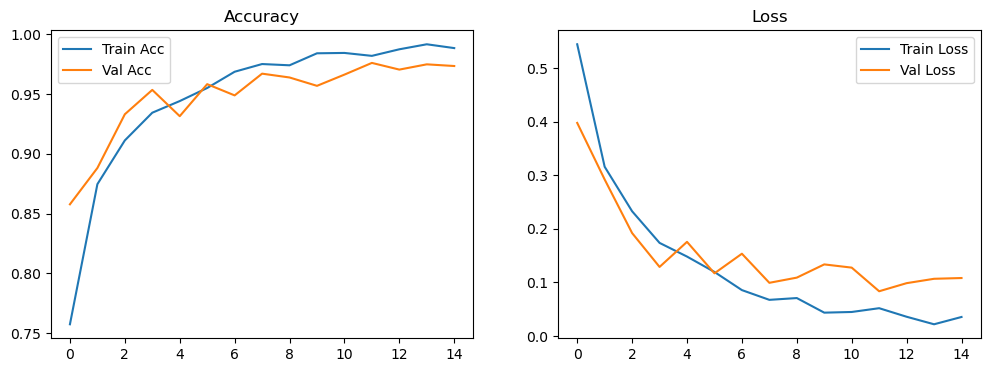

In [12]:
# Plot training history
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [13]:
# Evaluate
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 37s 234ms/step - accuracy: 0.9845 - loss: 0.0645
Test Accuracy: 0.97


In [14]:
# Confusion Matrix
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

print("Classification Report:")
print(classification_report(y_true, y_pred))

157/157 ━━━━━━━━━━━━━━━━━━━━ 31s 196ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1000
           1       0.98      1.00      0.99      1000
           2       0.92      0.98      0.95      1000
           3       0.99      1.00      1.00      1000
           4       0.99      0.91      0.95      1000

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000



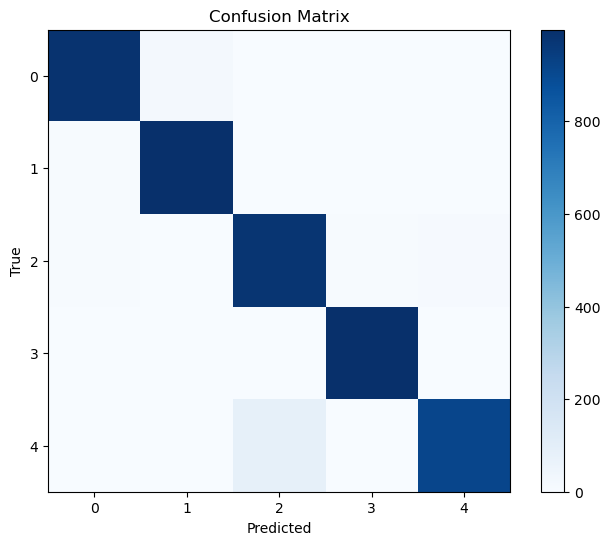

In [15]:
# Confusion matrix plot
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
